# **MobileNetSSD**

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


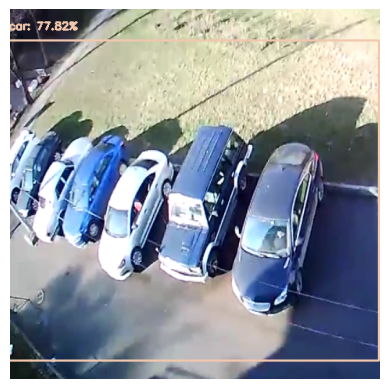

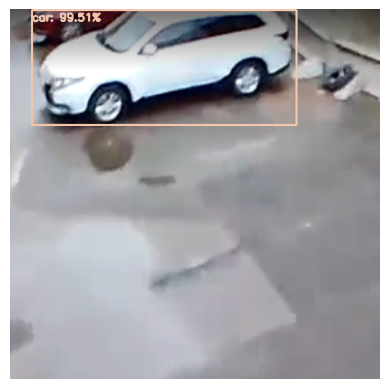

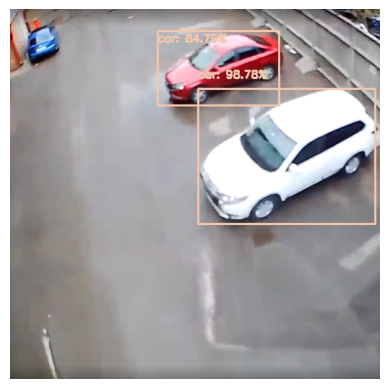

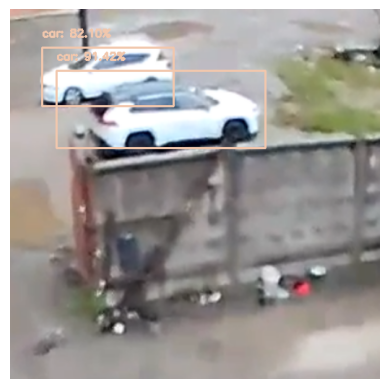

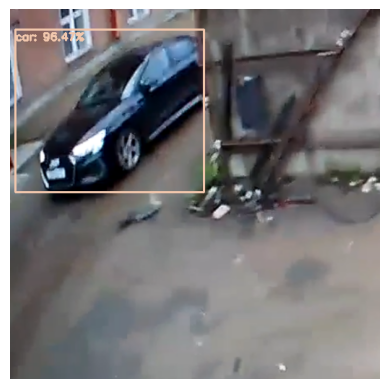

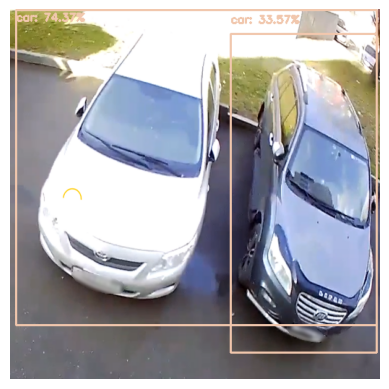

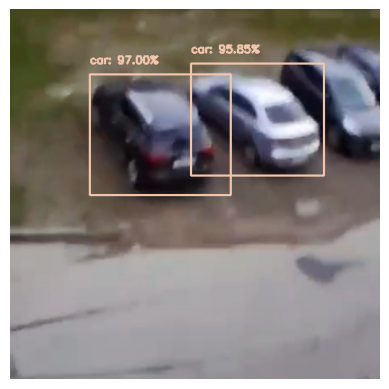

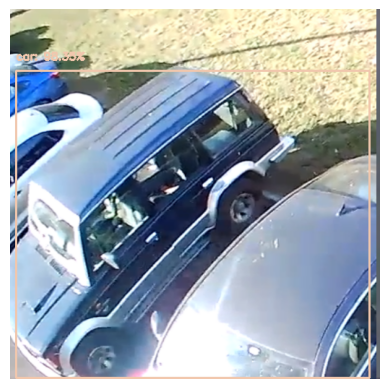

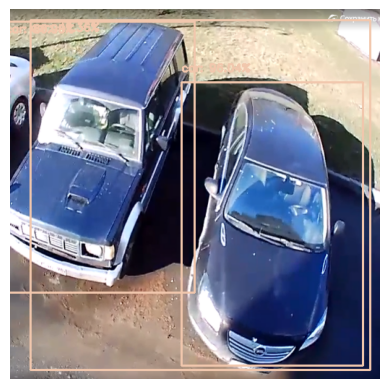

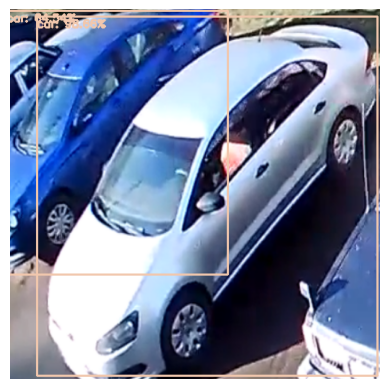

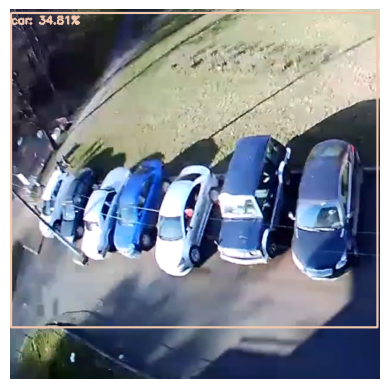

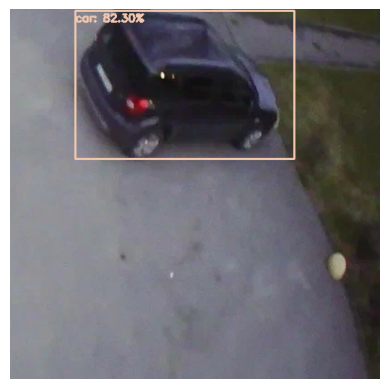

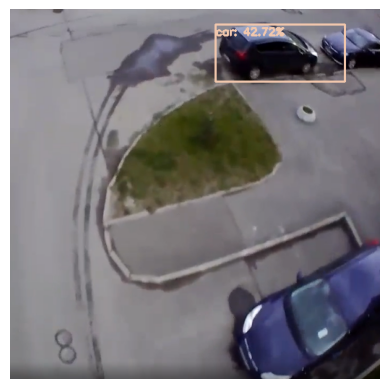

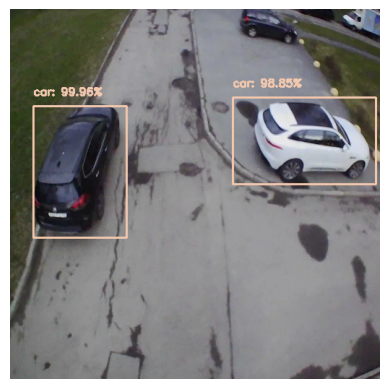

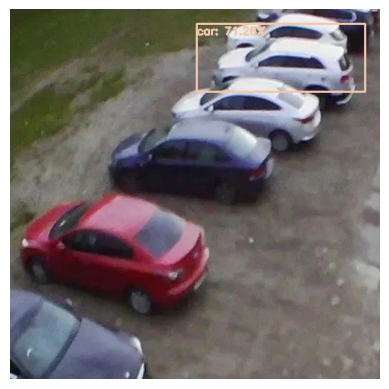

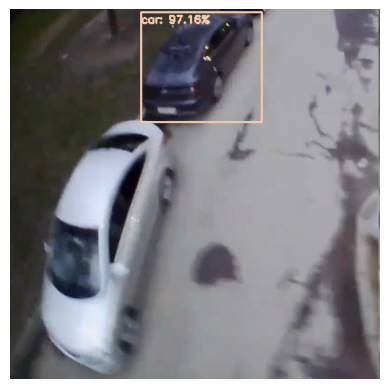

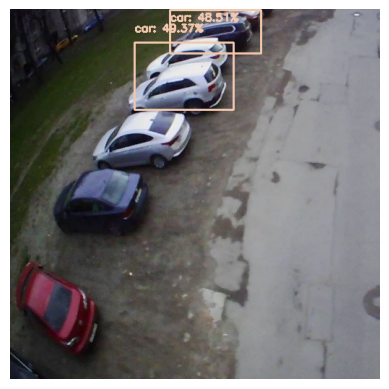

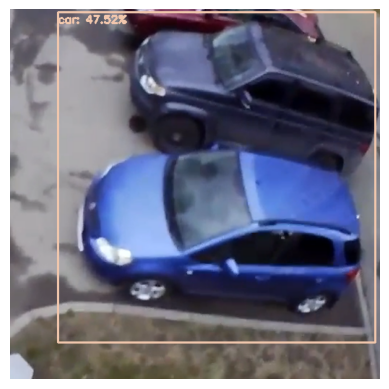

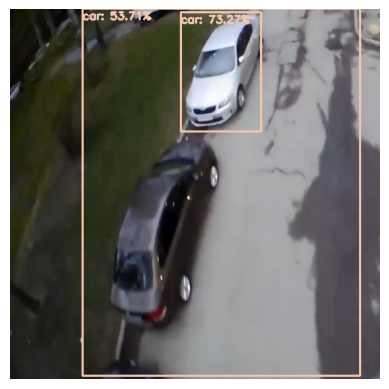

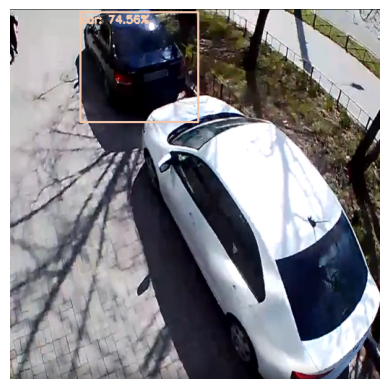

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# load our serialized model from disk
model = 'MobileNetSSD_deploy.caffemodel'
ptxt = 'MobileNetSSD_deploy.prototxt.txt'
net = cv2.dnn.readNetFromCaffe(ptxt, model)

# load the input images from the directory
images_dir = 'D:/GSSOC/Car-Detection from Drones/Images/Cars/Cars'
images = [os.path.join(images_dir, file) for file in os.listdir(images_dir)]

display_count = 0

# loop over the images
for img_path in images[:500]:
    image = cv2.imread(img_path)
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

    # pass the blob through the network and obtain the detections and
    # predictions
    net.setInput(blob)
    detections = net.forward()

    car_detected = False  # Initialize car_detected as False for each image
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]
        # greater than the minimum confidence
        if confidence > 0.3:
            idx = int(detections[0, 0, i, 1])
            if CLASSES[idx] == 'car':  # Check if the detected object is a car
                car_detected = True
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")

                # display the prediction
                label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
                cv2.rectangle(image, (startX, startY), (endX, endY),
                    COLORS[idx], 2)
                y = startY - 15 if startY - 15 > 15 else startY + 15
                cv2.putText(image, label, (startX, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
                
    # plot the output image using matplotlib if a car is detected
    if car_detected:
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        display_count += 1
        if display_count >= 20:
            break
